In [1]:
from google.colab import drive
drive.mount('/drive')
import os
os.chdir('/drive/My Drive/Deep Learning/CNN/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


#Defining a Convolutional Neural Network

- The convolutional layer
- The Pooling layer
- The output layer

In this layer, Suppose we have an image of size 6*6. We define a weight matrix which extracts certain features from the images

<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28010254/conv1.png'>


<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28011851/conv.gif">

We have initialized the weight as a 3 * 3 matrix. This weight shall now run across the image such that all the pixels are covered at least once, to give a convolved output. The value 429 above, is obtained by the adding the values obtained by element wise multiplication of the weight matrix and the highlighted 3*3 part of the input image.

The 6 * 6 image is now converted into a 4 * 4 image. 

Let’s see how this looks like in a real image.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28132834/convimages.png">

The weight matrix behaves like a filter in an image extracting particular information from the original image matrix. A weight combination might be extracting edges, while another one might a particular color, while another one might just blur the unwanted noise.

# The concept of stride and padding

The filter or the weight matrix, was moving across the entire image moving one pixel at a time. 

If the weight matrix moves 1 pixel at a time, we call it as a stride of 1. Let’s see how a stride of 2 would look like.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28090227/stride1.gif">

As you can see the size of image keeps on reducing as we increase the stride value. Padding the input image with zeros across it solves this problem for us. We can also add more than one layer of zeros around the image in case of higher stride values.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28093553/zero-padding.png">

We can see how the initial shape of the image is retained after we padded the image with a zero. This is known as ***same padding*** since the output image has the same size as the input. 

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28094927/padding.gif">

### Multiple filters and the activation map

The output from the each filter is stacked together forming the depth dimension of the convolved image. Suppose we have an input image of size 32 * 32 * 3. And we apply 10 filters of size 5 * 5 * 3 with valid padding. The output would have the dimensions as 28 * 28 * 10.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28113904/activation-map.png">

This activation map is the output of the convolution layer.

# The Pooling Layer

It is then desired to periodically introduce pooling layers between subsequent convolution layers. Pooling is done for the sole purpose of reducing the spatial size of the image. Pooling is done independently on each depth dimension, therefore the depth of the image remains unchanged. The most common form of pooling layer generally applied is the ***max pooling.***

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28022816/maxpool.png">

Here we have taken stride as 2, while pooling size also as 2. The max operation is applied to each depth dimension of the convolved output. As you can see, the $4*4$ convolved output has become $2*2$ after the max pooling operation.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28133544/pooling.png">

As you can see I have taken convoluted image and have applied max pooling on it. The max pooled image still retains the information that it’s a car on a street. If you look carefully, the dimensions if the image have been ***halved***. This helps to reduce the parameters to a great extent.

***The number of filters*** – the depth of the output volume will be equal to the number of filter applied. 

***Stride*** – When we have a stride of one we move across and down a single pixel. With higher stride values, we move large number of pixels at a time and hence produce smaller output volumes.

***Zero padding*** – This helps us to preserve the size of the input image.

We can apply a simple formula to calculate the output dimensions. The spatial size of the output image can be calculated as

## ${\frac{W-F+2P}{S}} + 1$

Here, W is the input volume size, F is the size of the filter, P is the number of padding applied and S is the number of strides

# The Output layer

After multiple layers of convolution and padding, we would need the output in the form of a class. The convolution and pooling layers would only be able to extract features and reduce the number of parameters from the  original images. However, to generate the final output we need to apply a fully connected layer to generate an output equal to the number of classes we need.


# Finally

CNN as you can now see is composed of various convolutional and pooling layers.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/28132045/cnnimage.png">

# Step 1: Import libraries and modules.

In [0]:
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


# Step 2: Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# Step 3: Preprocess input data

In [0]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) # Including the depth 1
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28) # Including the depth 1
X_train = X_train.astype('float32') # Changing dtype to float
X_test = X_test.astype('float32') # Changing the dtype to float
X_train /= 255 # Normalizing the values 
X_test /= 255 # Normalizing the values

In [5]:
X_train.shape

(60000, 1, 28, 28)

In [6]:
y_train.shape

(60000,)

# Step 4: Preprocess class labels for Keras.

In [0]:
y_train[:10] # Understanding the target labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10) # Converting the data into 0 and 1
Y_test = np_utils.to_categorical(y_test, 10) # Converting the data into 0 and 1

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
Y_train.shape

(60000, 10)

# Points to be noted before building the architecture of Convolution Neural Network

- The fundamental difference between a densely connected layers and a convolution layers is that **Dense Layers** learn global patterns in their input feature space (for example a digit pattern involving all pixels), whereas convolution layers learn local patterns (for example patterns found in small 2D windows of the inputs.

**This has two added advantages**
- **The patterns they learn are translation invariant** i.e after learning a certain pattern in the lower right corner of a picture, a convnet can recognize it anywhere.

- **They can learn spatial hierarchies of patterns** - For Example, A first convolution layer will learn small local patterns such as edges, a second comvolution layer will learn larger patterns made of features of the first layers and so on. 

**RELU** - ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x) Visually, it looks like the following:

<img src='https://miro.medium.com/max/1026/1*DfMRHwxY1gyyDmrIAd-gjQ.png' height="180" width="320">

- (1,28,28) 
  - 1 represents depth as the image is in grayscale (3 for RGB)
  - 28 represents height
  - 28 represents width of the image
- 32 - represents number of convnets in convolution layer
- (3,3) - represents Kernel Size

**MaxPooling** - Maximum value over the data to be selected.

**Dropout** - Dropping the neurons or ignoring the neurons. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left

To prevent overfitting we need dropout.

**Softmax** - Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.

**Flatten** - Flatten converts the data into a row matrix

**Adam Optimizer**

**Cross Entropy** - $-\sum ylog(p_i)$





# Step 5:  Define model architecture.

In [7]:
model = Sequential()
 
###################### Convolution Neural Network ######################

model.add(Convolution2D(32,(3, 3), activation='relu', 
                        input_shape=(1,28,28),
                        data_format='channels_first')) # Convolution Layer

model.add(Convolution2D(32,(3, 3), activation='relu')) # Conolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer
model.add(Dropout(0.25)) # Drop out to handle overfitting

model.add(Convolution2D(32,(3, 3), activation='relu')) # Convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer
model.add(Dropout(0.25)) # Drop out to handle overfitting

model.add(Convolution2D(32,(3, 3), activation='relu')) # Convolution Layer
model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer 
model.add(Flatten()) # Image flattening to row matrix

###################### Feed Forward Network ############################

model.add(Dense(1024, activation='relu')) # Input neurons
model.add(Dropout(0.5))

model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Step 6: Compile model.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 7: Fit model on training data.

In [0]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  




Epoch 1/10
60000/60000 [==============================] - 30s 500us/step - loss: 1.4799 - acc: 0.4809
Epoch 2/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.7662 - acc: 0.7851
Epoch 3/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.5801 - acc: 0.8523
Epoch 4/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.5471 - acc: 0.8638
Epoch 5/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.4969 - acc: 0.8785
Epoch 6/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.4720 - acc: 0.8861
Epoch 7/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.4923 - acc: 0.8859
Epoch 8/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.4377 - acc: 0.8958
Epoch 9/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.4257 - acc: 0.9000
Epoch 10/10
60000/60000 [==============================] - 25s 416us/step - loss

In [0]:
import joblib

In [12]:
joblib.dump(model,'cnn1.pkl')

['cnn1.pkl']

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
score # Returns loss and metrics for the model

[0.23170108579993248, 0.9583]

In [0]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
X_train[0].shape

(1, 28, 28)

In [0]:
os.listdir('/drive/My Drive/Deep Learning')

['Manual Neural Network.ipynb',
 'BigMaxIndex.xlsx',
 '9.jpg',
 'linearsgd',
 'graph2',
 'graph3',
 'Keras.ipynb',
 'CNN',
 'RNN',
 'Basics',
 'mnist_data',
 'neural_class',
 'numberclass_nn',
 'Keras Basic',
 'How to overfit with Neural Network.ipynb',
 'Variables AND Placeholders.ipynb',
 'ANN.ipynb',
 'Batch3034',
 'Linear Regression - SGD1.ipynb',
 'Face Recognition',
 'NN Classification.ipynb',
 'NN Classification-Adam.ipynb',
 'Interview',
 'Linear Regression using Neural Networks.ipynb',
 '4.jpg']

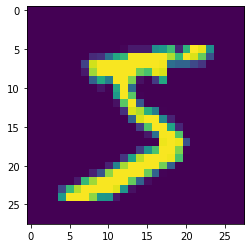

In [0]:
plt.imshow(X_train[0].reshape(28,28))

In [0]:
img = cv2.imread('/drive/MyDrive/Deep Learning/3.jpg',0) 

In [0]:
img

In [0]:
from google.colab.patches import cv2_imshow

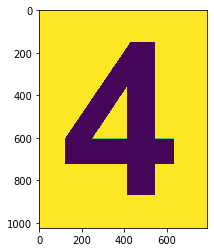

In [0]:
plt.imshow(img)

In [0]:
# Converting the image 9 to above input image format

In [0]:
img_not = cv2.bitwise_not(img)

In [0]:
img_not

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

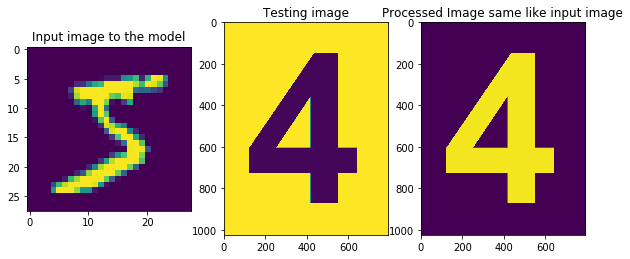

In [0]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(X_train[0].reshape(28,28))
plt.title("Input image to the model")


plt.subplot(1,3,2)
plt.imshow(img)
plt.title("Testing image")


plt.subplot(1,3,3)
plt.imshow(img_not)
plt.title("Processed Image same like input image")
plt.show()

In [0]:
# Step - 3 : resize into 28 * 28
img_resize = cv2.resize(img_not,(28,28))

# Normalize
img_norm = img_resize/255

#step - 4 : reshape into 1 * 784
test = img_norm.reshape(1,1,28,28)

In [0]:
test.shape

(1, 1, 28, 28)

In [0]:
X_train[0].shape

(1, 28, 28)

In [0]:
b = []
for i in model.predict(test).tolist():
  for en,j in enumerate(i):
    b.append([j,en])

In [0]:
sorted(b,reverse=True)

[[1.0, 4],
 [5.535747860108131e-09, 9],
 [1.334044201747715e-16, 7],
 [2.7306549656717586e-26, 5],
 [0.0, 8],
 [0.0, 6],
 [0.0, 3],
 [0.0, 2],
 [0.0, 1],
 [0.0, 0]]

In [0]:
img_resize.max()

252

In [0]:
b

[array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.7306550e-26, 0.0000000e+00, 1.3340442e-16,
        0.0000000e+00, 5.5357479e-09], dtype=float32)]

In [0]:
for i in model.predict(X_test):
  

67847

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
model1 = joblib.load('cnn1.pkl')

In [0]:
img = cv2.imread('/drive/My Drive/Deep Learning/4.jpg',0)

In [15]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [0]:
img_not = cv2.bitwise_not(img)

In [17]:
img_not

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
# Step - 3 : resize into 28 * 28
img_resize = cv2.resize(img_not,(28,28))

# Normalize
img_norm = img_resize/255

#step - 4 : reshape into 1 * 784
test = img_norm.reshape(1,1,28,28)

In [20]:
model1.predict(test).argmax()

7